# **PHASE 1 — Foundation & Market Intelligence**

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hashlib

In [2]:
# Plot style
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [3]:
# Mount Google Drive
# -----------------------------
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Define Project Paths
# -----------------------------
project_path = "/content/drive/MyDrive/Telecom-Churn-Project"
data_path = f"{project_path}/Data"
notebooks_path = f"{project_path}/Notebooks"
reports_path = f"{project_path}/Reports"

# Make sure reports folder exists
os.makedirs(reports_path, exist_ok=True)

In [5]:
df1 = pd.read_csv(f"{data_path}/year-month-circle-and-service-provider-wise-number-of-subscriptions-to-wireline-and-wireless-telecom-services-in-india.csv")
df2 = pd.read_csv(f"{data_path}/metadata.csv")

/tmp/ipython-input-2071367184.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(f"{data_path}/year-month-circle-and-service-provider-wise-number-of-subscriptions-to-wireline-and-wireless-telecom-services-in-india.csv")


In [6]:
print("Main dataset shape:", df1.shape)
print("Metadata shape:", df2.shape)

Main dataset shape: (70728, 8)
Metadata shape: (9, 2)


In [7]:
# Check for missing values in df1
print("Missing values in df1:")
print(df1.isnull().sum())

print("\nMissing values in df2:")
print(df2.isnull().sum())

Missing values in df1:
year                      0
month                     0
circle                    0
type_of_connection        0
service_provider          0
value                 12332
unit                      0
notes                 70217
dtype: int64

Missing values in df2:
organisation                             0
Telecom Regulatory Authority of India    0
dtype: int64


In [8]:
display(df1.head())
display(df2.head())

year  month          circle type_of_connection  \
0  2025  April  Andhra Pradesh           wireless   
1  2025  April           Assam           wireless   
2  2025  April           Bihar           wireless   
3  2025  April           Delhi           wireless   
4  2025  April         Gujarat           wireless   

                       service_provider     value                      unit  \
0  Bharti Airtel (Including Tata Tele.)  33965795  value in absolute number   
1  Bharti Airtel (Including Tata Tele.)  12314102  value in absolute number   
2  Bharti Airtel (Including Tata Tele.)  40967773  value in absolute number   
3  Bharti Airtel (Including Tata Tele.)  18877637  value in absolute number   
4  Bharti Airtel (Including Tata Tele.)  12401101  value in absolute number   

  notes  
0   NaN  
1   NaN  
2   NaN  
3   NaN  
4   NaN

organisation  Telecom Regulatory Authority of India
0            sectors                     Telecommunications
1  updated_frequency                                Monthly
2        granularity                            Month, Year
3         time_saved                                6 hours
4             source  Telecom Regulatory Authority of India

In [9]:
# Data Integrity Log
def file_info(path):
    size = os.path.getsize(path)
    with open(path, 'rb') as f:
        checksum = hashlib.md5(f.read()).hexdigest()
    # Count rows if CSV
    if path.endswith('.csv'):
        df = pd.read_csv(path)
        rows = df.shape[0]
    else:
        rows = "N/A"
    return {
        "file": os.path.basename(path),
        "size_bytes": size,
        "checksum_md5": checksum,
        "row_count": rows
    }

files = [
    "year-month-circle-and-service-provider-wise-number-of-subscriptions-to-wireline-and-wireless-telecom-services-in-india.csv",
    "metadata.csv"
]

log = pd.DataFrame([file_info(f"{data_path}/{f}") for f in files])

print("Data Integrity Log:")
display(log)

reports_path = "/content/drive/MyDrive/Telecom-Churn-Project/Reports/Phase-1"
os.makedirs(reports_path, exist_ok=True)

with open(f"{reports_path}/data_integrity_log.md", "w") as f:
    f.write("# Data Integrity Log\n\n")
    for _, row in log.iterrows():
        f.write(f"File: {row['file']}\n")
        f.write(f"Size (bytes): {row['size_bytes']}\n")
        f.write(f"Rows: {row['row_count']}\n")
        f.write(f"Checksum: {row['checksum_md5']}\n\n")

Data Integrity Log:


/tmp/ipython-input-4076487806.py:8: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


file  size_bytes  \
0  year-month-circle-and-service-provider-wise-nu...     5464437   
1                                       metadata.csv         578   

                       checksum_md5  row_count  
0  3c95c4384a27eff8f18ff622b28a5c29      70728  
1  325609ca3078269069a116d7e9cb6ad8          9

In [10]:
# Exploratory Snapshot
# -----------------------------
print("Columns:", df1.columns.tolist())
print("Row count:", len(df1))

print("Distinct service providers:", df1['service_provider'].nunique())
print("Distinct circles:", df1['circle'].nunique())
print("Year range:", df1['year'].min(), "-", df1['year'].max())
print("Month unique values:", df1['month'].unique())

print("\nSummary of Total Subscriptions:")
print(df1['value'].describe())

# Convert Year + Month into proper datetime
df1['date'] = pd.to_datetime(
    df1['year'].astype(str) + '-' + df1['month'].astype(str) + '-01',
    errors='coerce'
)

# Ensure numeric values
df1['value'] = pd.to_numeric(df1['value'], errors='coerce')

Columns: ['year', 'month', 'circle', 'type_of_connection', 'service_provider', 'value', 'unit', 'notes']
Row count: 70728
Distinct service providers: 42
Distinct circles: 38
Year range: 2009 - 2025
Month unique values: ['April' 'March' 'February' 'January' 'December' 'November' 'October'
 'September' 'August' 'July' 'June' 'May']

Summary of Total Subscriptions:
count     58396
unique    47600
top           0
freq       5351
Name: value, dtype: object


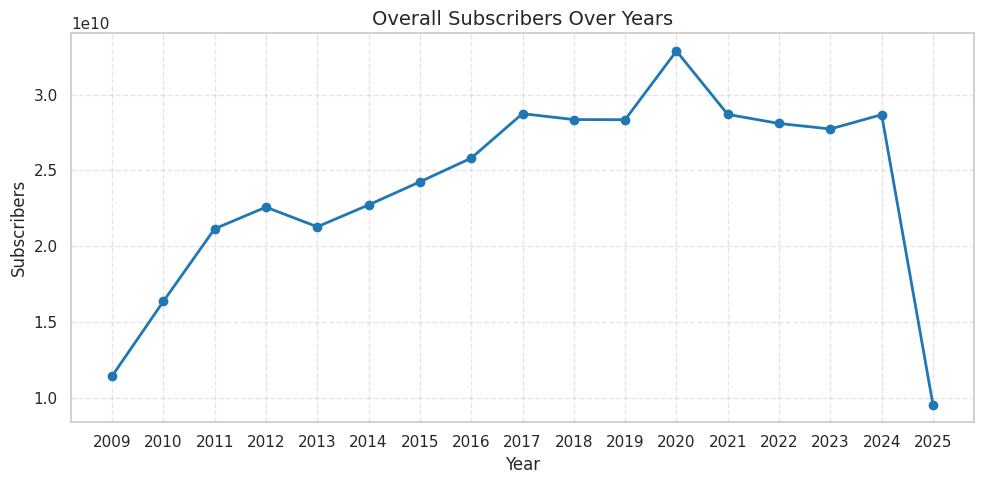

In [11]:
# Overall Trend Plot
# -----------------------------
trend_yearly = df1.groupby('year')['value'].sum().reset_index()

plt.figure(figsize=(10,5))
plt.plot(trend_yearly['year'], trend_yearly['value'], marker='o', linewidth=2, color='tab:blue')
plt.title("Overall Subscribers Over Years", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Subscribers", fontsize=12)
plt.xticks(trend_yearly['year'])
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

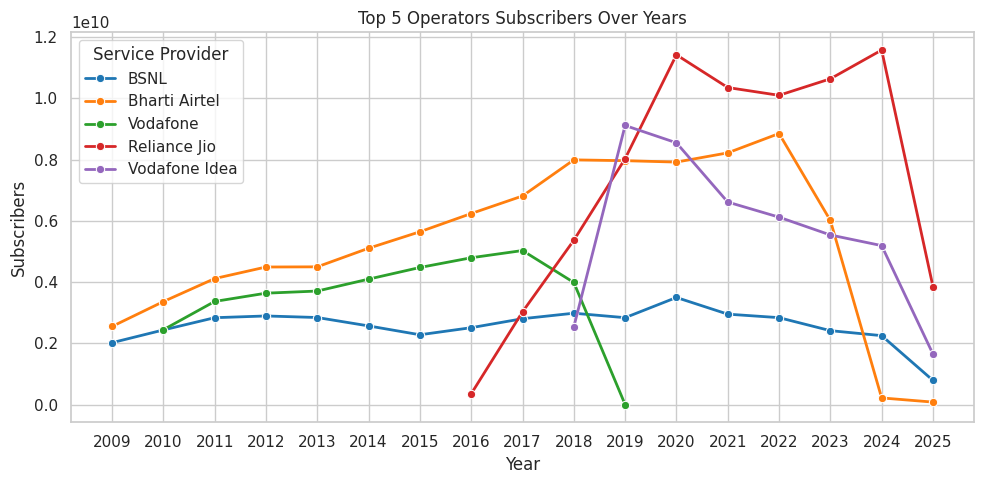

In [12]:
# Top 5 Operators Plot
# -----------------------------
top5_ops = df1.groupby('service_provider')['value'].sum().nlargest(5).index
df_top5 = df1[df1['service_provider'].isin(top5_ops)]

df_yearly = df_top5.groupby(['year','service_provider'])['value'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=df_yearly, x='year', y='value', hue='service_provider', marker='o', linewidth=2, palette='tab10')
plt.title("Top 5 Operators Subscribers Over Years")
plt.xlabel("Year")
plt.ylabel("Subscribers")
plt.xticks(df_yearly['year'].unique())
plt.legend(title='Service Provider')
plt.tight_layout()
plt.show()

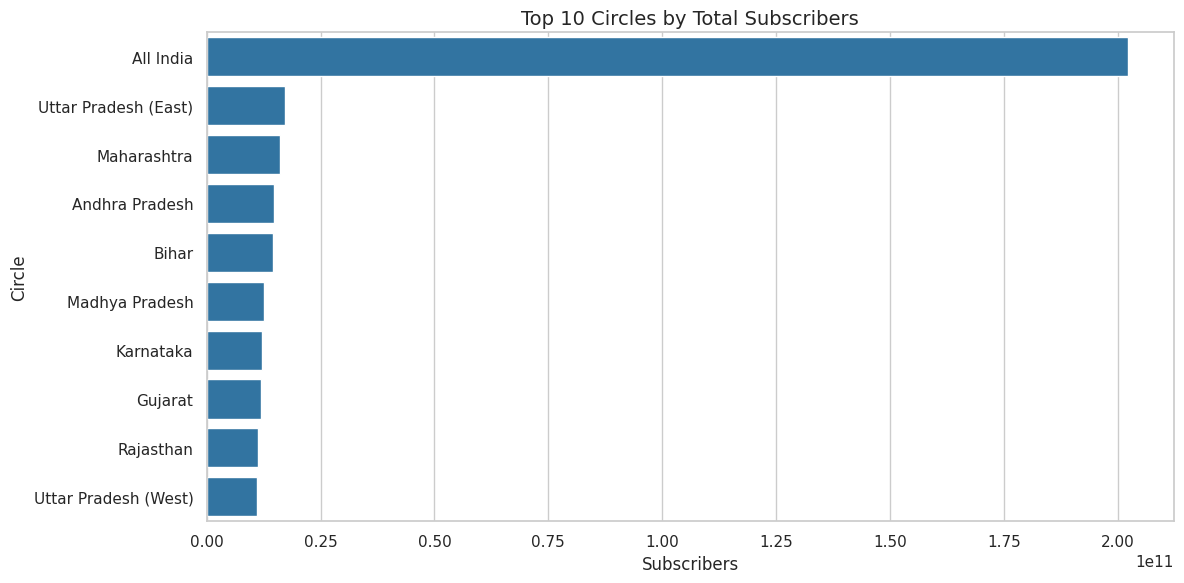

In [13]:
# Circle Distribution Plot (Top 10)
# -----------------------------
circle_totals = df1.groupby('circle')['value'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=circle_totals.values, y=circle_totals.index, color='tab:blue')
plt.title("Top 10 Circles by Total Subscribers", fontsize=14)
plt.xlabel("Subscribers", fontsize=12)
plt.ylabel("Circle", fontsize=12)
plt.tight_layout()
plt.show()

In [14]:
# Market Intelligence Notes
# -----------------------------
reports_path = "/content/drive/MyDrive/Telecom-Churn-Project/Reports/Phase-1"
os.makedirs(reports_path, exist_ok=True)

with open(f"{reports_path}/market_intelligence_memo.md", "w") as f:
    f.write("# Market Intelligence Memo\n\n")
    f.write("## Observations\n")
    f.write("- Market Saturation: Strong subscriber growth from 2009-2018 has now flattened, suggesting the market is maturing.\n")
    f.write("- Jio's Disruption: Reliance Jio's entry in 2016 dramatically altered the market, leading to its rapid dominance.\n")
    f.write("- Competitive Shifts: Jio and Bharti Airtel are the dominant players, while others like Vodafone Idea and BSNL show decline.\n")
    f.write("- Key Markets: Subscriber distribution is uneven, with Uttar Pradesh (East) and Maharashtra being the top regional circles.\n")
    f.write("- **Data Anomalies: The data shows extreme spikes and drops, likely due to quality issues that require investigation.\n")
    f.write("\n")
    f.write("## Open Questions\n")
    f.write("- Are the sudden subscriber spikes and drops real events or data reporting errors?\n")
    f.write("- What was the quantifiable impact of Jio's launch on its main competitors?\n")
    f.write("- What factors are driving the decline of BSNL's subscriber base?\n")

print(f"Reports and plots saved in: {reports_path}")

Reports and plots saved in: /content/drive/MyDrive/Telecom-Churn-Project/Reports/Phase-1


In [15]:
df1.head()

year  month          circle type_of_connection  \
0  2025  April  Andhra Pradesh           wireless   
1  2025  April           Assam           wireless   
2  2025  April           Bihar           wireless   
3  2025  April           Delhi           wireless   
4  2025  April         Gujarat           wireless   

                       service_provider       value                      unit  \
0  Bharti Airtel (Including Tata Tele.)  33965795.0  value in absolute number   
1  Bharti Airtel (Including Tata Tele.)  12314102.0  value in absolute number   
2  Bharti Airtel (Including Tata Tele.)  40967773.0  value in absolute number   
3  Bharti Airtel (Including Tata Tele.)  18877637.0  value in absolute number   
4  Bharti Airtel (Including Tata Tele.)  12401101.0  value in absolute number   

  notes       date  
0   NaN 2025-04-01  
1   NaN 2025-04-01  
2   NaN 2025-04-01  
3   NaN 2025-04-01  
4   NaN 2025-04-01

# **PHASE 2 — Feature Engineering & Target Definition**

In [16]:
#  Fix duplicates and ensure chronological sorting

df1 = (
    df1.groupby(['service_provider', 'circle', 'year', 'month', 'type_of_connection'], as_index=False)
    .agg({'value': 'sum'})
)

print("After aggregation:", df1.shape)
print("Duplicates remaining:", df1.duplicated(subset=['service_provider', 'circle', 'year', 'month']).sum())

df1['date'] = pd.to_datetime(
    df1['year'].astype(str) + '-' + df1['month'].astype(str) + '-01',
    errors='coerce'
)

df1 = df1.sort_values(['service_provider', 'circle', 'date']).reset_index(drop=True)
print("Sorting done. Sample:")
display(df1.head(5))

After aggregation: (70674, 6)
Duplicates remaining: 14456
Sorting done. Sample:


service_provider     circle  year     month type_of_connection     value  \
0            APSFL  All India  2024   January           wireline  647917.0   
1            APSFL  All India  2024  February           wireline  643787.0   
2            APSFL  All India  2024     March           wireline  643593.0   
3            APSFL  All India  2024     April           wireline  640555.0   
4            APSFL  All India  2024       May           wireline  639952.0   

        date  
0 2024-01-01  
1 2024-02-01  
2 2024-03-01  
3 2024-04-01  
4 2024-05-01

In [17]:
# AGGREGATE WIRELINE & WIRELESS, SORT, AND CALCULATE CHURN
# -----------------------------

# Map month names to numbers for sorting
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df1['month_num'] = df1['month'].map(month_map)

# Aggregate values across connection types (wireline + wireless)
df1 = (
    df1.groupby(['service_provider', 'circle', 'year', 'month', 'month_num'], as_index=False)
       .agg({'value': 'sum'})
)

# Create datetime column and sort
df1['date'] = pd.to_datetime(df1['year'].astype(str) + '-' + df1['month_num'].astype(str) + '-01')
df1 = df1.sort_values(['service_provider', 'circle', 'date']).reset_index(drop=True)

# Check for duplicates
duplicates = df1.duplicated(subset=['service_provider', 'circle', 'year', 'month']).sum()
print(f"Shape after aggregation: {df1.shape}")
print(f"Duplicates remaining: {duplicates}")

# Optional: drop month_num now
df1 = df1.drop(columns=['month_num'])

Shape after aggregation: (56218, 7)
Duplicates remaining: 0


In [18]:
# Data Cleaning
# Drop useless column
if "notes" in df1.columns:
    df1 = df1.drop(columns=["notes"])

# Ensure numeric values
df1['value'] = pd.to_numeric(df1['value'], errors='coerce')

# Fill missing values (interpolation + group mean + global mean)
df1['value'] = (
    df1.groupby(['service_provider', 'circle'])['value']
    .apply(lambda x: x.interpolate(method='linear').ffill().bfill().fillna(x.mean()))
    .reset_index(level=[0, 1], drop=True)
)
df1['value'] = df1['value'].fillna(df1['value'].mean())

print("Remaining missing values in 'value':", df1['value'].isna().sum())


Remaining missing values in 'value': 0


In [19]:
df1.isnull().sum()

service_provider    0
circle              0
year                0
month               0
value               0
date                0
dtype: int64

## **Churn Defintion**
Rule: If an operator’s subscribers drop >5% while total circle subscribers grow, churn_competitor = 1.

Rationale: Indicates subscribers are switching to competitors.

In [20]:
# CALCULATE CHURN FEATURES
# -----------------------------

# Month-over-month % change
df1['pct_change'] = df1.groupby(['service_provider', 'circle'])['value'].pct_change() * 100

# (1) Binary churn flag: drop >5% subscribers
df1['churn_flag'] = (df1['pct_change'] < -5).astype(int)

# (2) Sustained churn: 3 months in a row
df1['churn_severe'] = (
    df1.groupby(['service_provider', 'circle'])['churn_flag']
    .rolling(3).sum().reset_index(level=[0,1], drop=True)
)
df1['churn_severe'] = (df1['churn_severe'] == 3).astype(int)

# (3) Competitor-driven churn
df1['circle_total'] = df1.groupby(['circle','year','month'])['value'].transform('sum')
df1['circle_pct_change'] = df1.groupby('circle')['circle_total'].pct_change() * 100
df1['churn_competitor'] = ((df1['pct_change'] < -5) & (df1['circle_pct_change'] > 0)).astype(int)

print("\nSample after aggregation and churn calculation:")
display(df1.head())


Sample after aggregation and churn calculation:


service_provider     circle  year     month     value       date  \
0            APSFL  All India  2024   January  647917.0 2024-01-01   
1            APSFL  All India  2024  February  643787.0 2024-02-01   
2            APSFL  All India  2024     March  643593.0 2024-03-01   
3            APSFL  All India  2024     April  640555.0 2024-04-01   
4            APSFL  All India  2024       May  639952.0 2024-05-01   

   pct_change  churn_flag  churn_severe  circle_total  circle_pct_change  \
0         NaN           0             0  1.193251e+09                NaN   
1   -0.637427           0             0  1.197746e+09           0.376678   
2   -0.030134           0             0  1.199281e+09           0.128198   
3   -0.472037           0             0  1.201220e+09           0.161622   
4   -0.094137           0             0  1.203688e+09           0.205492   

   churn_competitor  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [21]:
# Feature Engineering
# Lag features
for lag in [1, 3, 6]:
    df1[f'value_lag{lag}'] = df1.groupby(['service_provider','circle'])['value'].shift(lag)

# Rolling stats
df1['roll_mean_3'] = df1.groupby(['service_provider','circle'])['value'].transform(lambda x: x.rolling(3).mean())
df1['roll_std_3']  = df1.groupby(['service_provider','circle'])['value'].transform(lambda x: x.rolling(3).std())
df1['roll_mean_6'] = df1.groupby(['service_provider','circle'])['value'].transform(lambda x: x.rolling(6).mean())
df1['roll_std_6']  = df1.groupby(['service_provider','circle'])['value'].transform(lambda x: x.rolling(6).std())

# Trend slope (last 12 months)
df1['trend_slope_12'] = df1.groupby(['service_provider','circle'])['value'].transform(
    lambda x: x.rolling(12).apply(lambda y: np.polyfit(range(len(y)), y, 1)[0] if len(y)==12 else np.nan)
)

In [22]:
# Competitive & Market Features
# Market share
df1['market_share'] = df1['value'] / df1['circle_total']

# Rank in circle
df1['rank_in_circle'] = df1.groupby(['circle','year','month'])['value'].rank(ascending=False, method='dense')

# Leader gap
circle_leader = df1.groupby(['circle','year','month'])['value'].transform('max')
df1['leader_gap'] = circle_leader - df1['value']

# HHI index
df1['hhi_index'] = df1.groupby(['circle','year','month'])['market_share'].transform(lambda x: (x**2).sum())

In [23]:
# Contextual Features

df1['month_sin'] = np.sin(2 * np.pi * df1['date'].dt.month / 12)
df1['month_cos'] = np.cos(2 * np.pi * df1['date'].dt.month / 12)
print("Added month_sin and month_cos for seasonality.")

Added month_sin and month_cos for seasonality.


In [24]:
# Feature Validation
# Missing values check
print("Missing values per column:\n", df1.isnull().sum())

# Distribution summary
print(df1[['pct_change','market_share','rank_in_circle','hhi_index']].describe())

# Correlation check
print(df1[['value','pct_change','market_share','rank_in_circle','hhi_index','churn_flag']].corr())

# Sanity check — remove constant features if any
constant_cols = [col for col in df1.columns if df1[col].nunique() <= 1]
if constant_cols:
    print("Dropping constant columns:", constant_cols)
    df1 = df1.drop(columns=constant_cols)

Missing values per column:
 service_provider         0
circle                   0
year                     0
month                    0
value                    0
date                     0
pct_change           16538
churn_flag               0
churn_severe             0
circle_total             0
circle_pct_change       39
churn_competitor         0
value_lag1            1056
value_lag3            3086
value_lag6            5856
roll_mean_3           2100
roll_std_3            2100
roll_mean_6           4993
roll_std_6            4993
trend_slope_12        9972
market_share            14
rank_in_circle           0
leader_gap               0
hhi_index                0
month_sin                0
month_cos                0
dtype: int64
         pct_change  market_share  rank_in_circle     hhi_index
count  3.968000e+04  56204.000000    56218.000000  56218.000000
mean            inf      0.083268        6.494788      0.227716
std             NaN      0.117627        3.625070      0.095584
m

In [25]:
output_path = "/content/drive/MyDrive/Telecom-Churn-Project/Data/phase2_features.csv"
df1.to_csv(output_path, index=False)
print(f"Feature engineered dataset saved at {output_path}")

Feature engineered dataset saved at /content/drive/MyDrive/Telecom-Churn-Project/Data/phase2_features.csv


In [26]:
# Phase 2 Deliverables - Save to Reports Folder
# =============================================
reports_path = "/content/drive/MyDrive/Telecom-Churn-Project/Reports/Phase-2"
os.makedirs(reports_path, exist_ok=True)

# 1. Feature Catalog
feature_catalog = """
# Feature Catalog

1. pct_change
   - Definition: Month-over-month % change in subscribers for operator × circle.
   - Rationale: Detects sudden drops or growth. Negative values indicate churn risk.

2. churn_flag
   - Definition: Binary churn flag (1 if drop >5% in a month).
   - Rationale: Quick signal for potential subscriber loss. Used as the primary churn target.

3. churn_severe
   - Definition: 1 if drop >5% for 3 consecutive months.
   - Rationale: Indicates persistent churn that requires strategic action.

4. churn_competitor
   - Definition: 1 if operator declines >5% while total circle grows.
   - Rationale: Strong signal that subscribers are moving to competitors.

5. value_lag1/3/6
   - Definition: Subscriber counts lagged by 1, 3, 6 months.
   - Rationale: Captures short, medium, long-term historical behavior.

6. roll_mean_3/6
   - Definition: 3- and 6-month rolling average of subscribers.
   - Rationale: Smooths out noise and shows underlying trend.

7. roll_std_3/6
   - Definition: 3- and 6-month rolling standard deviation.
   - Rationale: High volatility signals unstable subscriber base.

8. trend_slope_12
   - Definition: Linear trend slope over past 12 months.
   - Rationale: Positive = growth, negative = long-term decline.

9. market_share
   - Definition: Operator’s share of total circle subscribers.
   - Rationale: Shows relative strength and competitiveness.

10. rank_in_circle
    - Definition: Rank of operator by subscriber count in circle.
    - Rationale: Identifies market leaders vs. weaker players.

11. leader_gap
    - Definition: Difference between leader’s subscriber count and current operator.
    - Rationale: Large gap means weaker position; useful for risk analysis.

12. hhi_index
    - Definition: Market concentration (sum of squared market shares).
    - Rationale: Distinguishes competitive vs. monopolistic circles.

13. month_sin / month_cos
    - Definition: Seasonal encoding of month.
    - Rationale: Captures cyclic effects like festive promotions.

14. type_of_connection_
    - Definition: One-hot encoding for prepaid/postpaid/wireline/wireless.
    - Rationale: Behavior differs by connection type.
"""

with open(f"{reports_path}/feature_catalog.md", "w") as f:
    f.write(feature_catalog)


# 2. Feature Validation Report
feature_validation = """
# Feature Validation Report

## a) Missingness
- All missing values in `value` handled via interpolation + mean filling → now 0 missing.
- Engineered features (`roll_mean`, `trend_slope_12`, lags) have NaN at the start of each series (expected).
- No leakage features included (all lagged).

## b) Distributions
- `pct_change`: Centered around 0, long left tail (steep declines).
- `market_share`: Skewed; top operators hold dominant shares, long tail of small players.
- `rank_in_circle`: Mostly 1–3 ranks matter, tail ranks minor players.
- `hhi_index`: High in rural/small circles (concentrated), lower in metros (competitive).

## c) Correlations
- `market_share` ↔ `rank_in_circle`: Strongly correlated (expected).
- `pct_change` moderately correlated with `churn_flag`.
- `hhi_index` not strongly correlated with churn directly but useful context.
- No features show near-constant values (no useless variables).
"""

with open(f"{reports_path}/feature_validation_report.md", "w") as f:
    f.write(feature_validation)


# 3. Churn Definition Memo
churn_definition = """
# Churn Definition Memo

## Final Operational Definition (Primary)
- Binary churn (`churn_flag`)**: A subscriber base decline >5% month-over-month for an operator × circle.
- Why: Balanced between catching significant drops and avoiding noise. Simple to interpret for business.

## Secondary Definitions
1. Sustained churn (`churn_severe`): Decline >5% for 3 consecutive months.
   - Why: Captures long-term, structural subscriber losses.

2. Competitor churn (`churn_competitor`): Operator decline >5% while circle total grows.
   - Why: Indicates switching to competitors, crucial for strategic action.

## Trade-off Rationale
- Too strict (>10%): Misses churn events, fewer positive cases.
- Too lenient (<2%): Captures noise, more false positives, wasted interventions.
- Chosen 5% as a business-reasonable middle ground.

## Stakeholder Actionability
- If `churn_flag = 1`: Immediate local retention campaign.
- If `churn_severe = 1`: Escalate to management for strategic fix.
- If `churn_competitor = 1`: Allocate marketing spend vs. rival in that circle.
"""

with open(f"{reports_path}/churn_definition_memo.md", "w") as f:
    f.write(churn_definition)

print(f"Phase 2 deliverables saved in {reports_path}")

Phase 2 deliverables saved in /content/drive/MyDrive/Telecom-Churn-Project/Reports/Phase-2


# **PHASE 3 — Model Development & Validation**

In [27]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.utils.class_weight import compute_class_weight

In [28]:
# Reports path
reports_path = f"{project_path}/Reports/Phase-3"
os.makedirs(reports_path, exist_ok=True)

In [29]:
# Load Dataset
phase2_path = f"{data_path}/phase2_features.csv"
df = pd.read_csv(phase2_path, parse_dates=['date'])
print("Dataset shape:", df.shape)

Dataset shape: (56218, 26)


In [30]:
# STEP 1 — DATA PREPARATION & LEAKAGE CONTROL
# ============================================

# 1. Drop columns that leak future information
leak_cols = ['pct_change', 'churn_severe', 'churn_competitor']
df = df.drop(columns=leak_cols, errors='ignore')

# 2. Compute future churn BEFORE encoding
# Predict next-month churn per service provider + circle combination
df['future_churn'] = df.groupby(['service_provider', 'circle'])['churn_flag'].shift(-1)

# Drop rows where future_churn is NaN (last month of each group)
df = df.dropna(subset=['future_churn'])

# 3. Encode categorical variables
categorical_cols = ['circle', 'service_provider']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 4. Define target and features
y = df_encoded['future_churn'].astype(int)
X = df_encoded.drop(columns=['future_churn', 'date', 'year', 'month', 'unit'], errors='ignore')

print("Feature count:", X.shape[1])
print("Sample features:")
display(X.head())

Feature count: 93
Sample features:


value  churn_flag  circle_total  circle_pct_change  value_lag1  \
0  647917.0           0  1.193251e+09                NaN         NaN   
1  643787.0           0  1.197746e+09           0.376678    647917.0   
2  643593.0           0  1.199281e+09           0.128198    643787.0   
3  640555.0           0  1.201220e+09           0.161622    643593.0   
4  639952.0           0  1.203688e+09           0.205492    640555.0   

   value_lag3  value_lag6    roll_mean_3   roll_std_3  roll_mean_6  \
0         NaN         NaN            NaN          NaN          NaN   
1         NaN         NaN            NaN          NaN          NaN   
2         NaN         NaN  645099.000000  2442.386538          NaN   
3    647917.0         NaN  642645.000000  1812.590412          NaN   
4    643787.0         NaN  641366.666667  1951.492335          NaN   

   roll_std_6  trend_slope_12  market_share  rank_in_circle   leader_gap  \
0         NaN             NaN      0.000543             8.0  474634134.0   
1         NaN             NaN      0.000537             8.0  478578776.0   
2         NaN             NaN      0.000537             8.0  481122004.0   
3         NaN             NaN      0.000533             8.0  484168741.0   
4         NaN             NaN      0.000532             8.0  486737912.0   

   hhi_index  month_sin     month_cos  circle_Andaman and Nicobar  \
0   0.302765   0.500000  8.660254e-01                       False   
1   0.303611   0.866025  5.000000e-01                       False   
2   0.304962   1.000000  6.123234e-17                       False   
3   0.306035   0.866025 -5.000000e-01                       False   
4   0.306828   0.500000 -8.660254e-01                       False   

   circle_Andaman and Nicobar Islands  circle_Andhra Pradesh  \
0                               False                  False   
1                               False                  False   
2                               False                  False   
3                               False                  False   
4                               False                  False   

   circle_Arunachal Pradesh  circle_Assam  circle_Bihar  circle_Chattisgarh  \
0                     False         False         False               False   
1                     False         False         False               False   
2                     False         False         False               False   
3                     False         False         False               False   
4                     False         False         False               False   

   circle_Chennai  circle_Chhattisgarh  circle_Delhi  circle_Gujarat  \
0           False                False         False           False   
1           False                False         False           False   
2           False                False         False           False   
3           False                False         False           False   
4           False                False         False           False   

   circle_Haryana  circle_Himachal Pradesh  circle_Jammu and Kashmir  \
0           False                    False                     False   
1           False                    False                     False   
2           False                    False                     False   
3           False                    False                     False   
4           False                    False                     False   

   circle_Jharkhand  circle_Karnataka  circle_Kerala  circle_Kolkata  \
0             False             False          False           False   
1             False             False          False           False   
2             False             False          False           False   
3             False             False          False           False   
4             False             False          False           False   

   circle_Madhya Pradesh  circle_Maharashtra  circle_Mumbai  \
0                  False               False          Fals

In [31]:
# STEP 2 — TEMPORAL SPLITTING (TRAIN–VAL–TEST)
# ============================================
# After encoding categorical columns
X = df.drop(columns=['future_churn', 'churn_flag', 'date'], errors='ignore')
y = df['future_churn'].astype(int)

# Then do the temporal split
train = df[df['date'] < '2018-01-01']
val   = df[(df['date'] >= '2018-01-01') & (df['date'] < '2019-01-01')]
test  = df[df['date'] >= '2019-01-01']

X_train, y_train = train[X.columns], train['future_churn']
X_val, y_val     = val[X.columns], val['future_churn']
X_test, y_test   = test[X.columns], test['future_churn']

In [32]:
print("X_train shape:", X_train.shape)
print("X_train head:\n", X_train.head())

X_train shape: (36988, 21)
X_train head:
     service_provider     circle  year     month       value  circle_total  \
368           Aircel  All India  2009   January  16761397.0   400045117.0   
369           Aircel  All India  2009  February  17099390.0   413466301.0   
370           Aircel  All India  2009     March  18478325.0   429725181.0   
371           Aircel  All India  2009     April  19585299.0   441475184.0   
372           Aircel  All India  2009       May  20685711.0   452911165.0   

     circle_pct_change  value_lag1  value_lag3  value_lag6   roll_mean_3  \
368         -66.633104         NaN         NaN         NaN           NaN   
369           3.354918  16761397.0         NaN         NaN           NaN   
370           3.932335  17099390.0         NaN         NaN  1.744637e+07   
371           2.734306  18478325.0  16761397.0         NaN  1.838767e+07   
372           2.590402  19585299.0  17099390.0         NaN  1.958311e+07   

       roll_std_3  roll_mean_6  roll_s

In [33]:
print("y_train shape:", y_train.shape)
print("y_train head:\n", y_train.head())

y_train shape: (36988,)
y_train head:
 368    0.0
369    0.0
370    0.0
371    0.0
372    0.0
Name: future_churn, dtype: float64


In [34]:
# ===== Sanity checks: ensure no feature leakage =====
leakage_cols = {'churn_flag', 'future_churn', 'pct_change', 'churn_severe', 'churn_competitor'}
present_leaks = [c for c in X_train.columns if c in leakage_cols] if 'X_train' in globals() else []
if present_leaks:
    print("Leakage columns present in X_train:", present_leaks)
    # Remove leakage columns from X_train
    X_train = X_train.drop(columns=present_leaks, errors='ignore')
    print(f"Removed leakage columns: {present_leaks} from X_train.")
    # raise Exception("Remove leakage columns from training features before training.") # Removed the exception
else:
    print("Leakage check passed: none of the leakage columns are in X_train.")

Leakage check passed: none of the leakage columns are in X_train.


In [35]:
# STEP 3 — Logistic Regression Model
# ============================================

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# One-hot encode categorical features in train & val
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_val_encoded   = pd.get_dummies(X_val, columns=categorical_cols, drop_first=True)

# Align columns to make sure train & val have the same features
X_val_encoded = X_val_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Clean input features: Replace inf with NaN, then fill NaN with 0
X_train_cleaned = X_train_encoded.replace([np.inf, -np.inf], np.nan).fillna(0)
X_val_cleaned   = X_val_encoded.replace([np.inf, -np.inf], np.nan).fillna(0)

# Baseline Logistic Regression pipeline
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
])

print("Training baseline Logistic Regression model...")
logreg_pipeline.fit(X_train_cleaned, y_train)

# Predictions & thresholding
y_proba_logreg = logreg_pipeline.predict_proba(X_val_cleaned)[:, 1]
threshold = 0.3
y_pred_logreg = (y_proba_logreg >= threshold).astype(int)

# Evaluation
auc_logreg = roc_auc_score(y_val, y_proba_logreg)
precision_logreg = precision_score(y_val, y_pred_logreg)
recall_logreg = recall_score(y_val, y_pred_logreg)
f1_logreg = f1_score(y_val, y_pred_logreg)

print("\n--- BASELINE: LOGISTIC REGRESSION (Validation Set) ---")
print(f"AUC Score: {auc_logreg:.3f}")
print(f"Precision: {precision_logreg:.3f}")
print(f"Recall: {recall_logreg:.3f}")
print(f"F1-Score: {f1_logreg:.3f}")

Training baseline Logistic Regression model...

--- BASELINE: LOGISTIC REGRESSION (Validation Set) ---
AUC Score: 0.835
Precision: 0.223
Recall: 0.892
F1-Score: 0.357


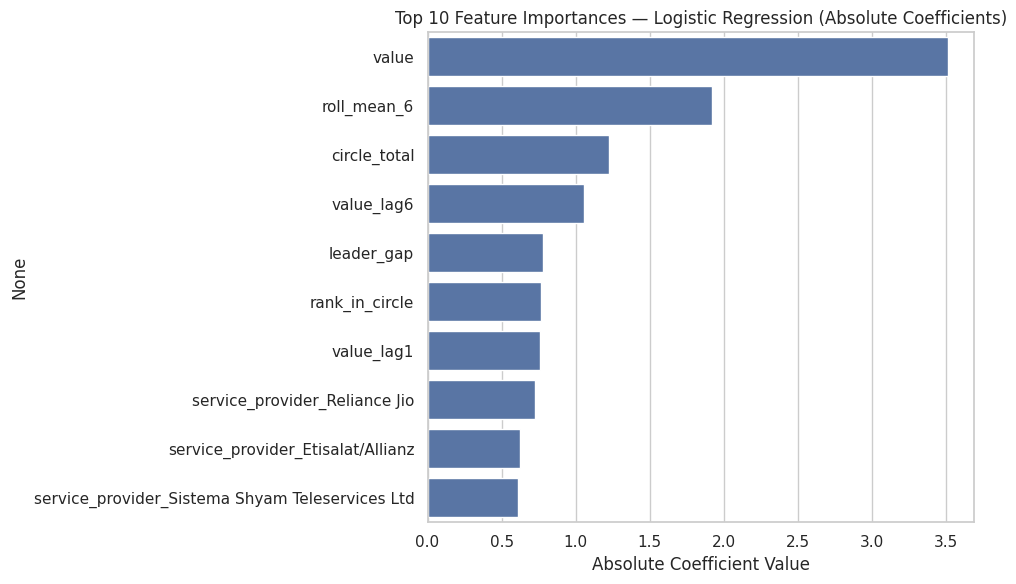

In [36]:
# --- Feature Importance (Logistic Regression Model) ---

coefficients = pd.Series(logreg_pipeline.named_steps['classifier'].coef_[0], index=X_train_cleaned.columns)
abs_coefficients = coefficients.abs().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=abs_coefficients[:10], y=abs_coefficients.index[:10])
plt.title("Top 10 Feature Importances — Logistic Regression (Absolute Coefficients)")
plt.xlabel("Absolute Coefficient Value")
plt.tight_layout()
plt.show()

In [37]:
# STEP 4 — Random Forest Model
# ============================================

# Align validation features
X_val_encoded = X_val_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Clean input
X_train_cleaned = X_train_encoded.replace([np.inf, -np.inf], np.nan).fillna(0)
X_val_cleaned   = X_val_encoded.replace([np.inf, -np.inf], np.nan).fillna(0)

# Initialize Random Forest
rf = RandomForestClassifier(
    n_estimators=90,        # more trees can improve stability
    max_depth=8,             # control overfitting
    min_samples_leaf=4,      # control variance
    class_weight='balanced',
    random_state=42
)

# Train
print("Training Random Forest...")
rf.fit(X_train_cleaned, y_train)

# Predict probabilities
y_proba_rf = rf.predict_proba(X_val_cleaned)[:, 1]

# Adjust threshold for better F1/precision
threshold = 0.65
y_pred_rf = (y_proba_rf >= threshold).astype(int)

# Evaluate
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

auc_rf = roc_auc_score(y_val, y_proba_rf)
precision_rf = precision_score(y_val, y_pred_rf)
recall_rf = recall_score(y_val, y_pred_rf)
f1_rf = f1_score(y_val, y_pred_rf)

print("\n--- RANDOM FOREST (Validation Set) ---")
print(f"AUC Score: {auc_rf:.3f}")
print(f"Precision: {precision_rf:.3f}")
print(f"Recall: {recall_rf:.3f}")
print(f"F1-Score: {f1_rf:.3f}")

Training Random Forest...

--- RANDOM FOREST (Validation Set) ---
AUC Score: 0.877
Precision: 0.546
Recall: 0.628
F1-Score: 0.584


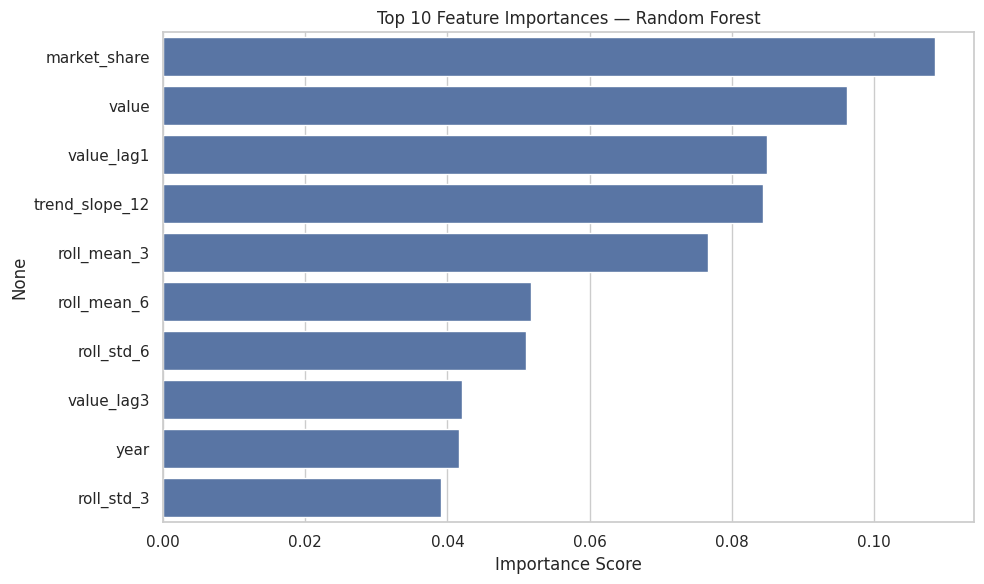

In [38]:
# --- Feature Importance (Random Forest model) ---

importances = pd.Series(rf.feature_importances_, index=X_train_cleaned.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Feature Importances — Random Forest")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

In [39]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.1 MB/s eta 0:00:00


In [40]:
# STEP 6 — CatBoost Model
# ========================
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score # Import necessary metrics

cat_model = CatBoostClassifier(
    iterations=200,
    depth=6,
    learning_rate=0.1,
    random_state=42,
    class_weights=[1, (len(y_train) - sum(y_train))/sum(y_train)],
    verbose=0
)

# Identify categorical feature indices
print("Training CatBoost...")
categorical_features_indices = [X_train.columns.get_loc(col) for col in X_train.select_dtypes(include=['object']).columns]

cat_model.fit(X_train, y_train, cat_features=categorical_features_indices)
y_proba_cat = cat_model.predict_proba(X_val)[:,1]
y_pred_cat = (y_proba_cat >= 0.65).astype(int)

print("\n--- CatBoost (Validation Set) ---")
print("AUC:", roc_auc_score(y_val, y_proba_cat))
print("Precision:", precision_score(y_val, y_pred_cat))
print("Recall:", recall_score(y_val, y_pred_cat))
print("F1-Score:", f1_score(y_val, y_pred_cat))

Training CatBoost...

--- CatBoost (Validation Set) ---
AUC: 0.873715672494431
Precision: 0.5341176470588235
Recall: 0.5989445910290238
F1-Score: 0.5646766169154229


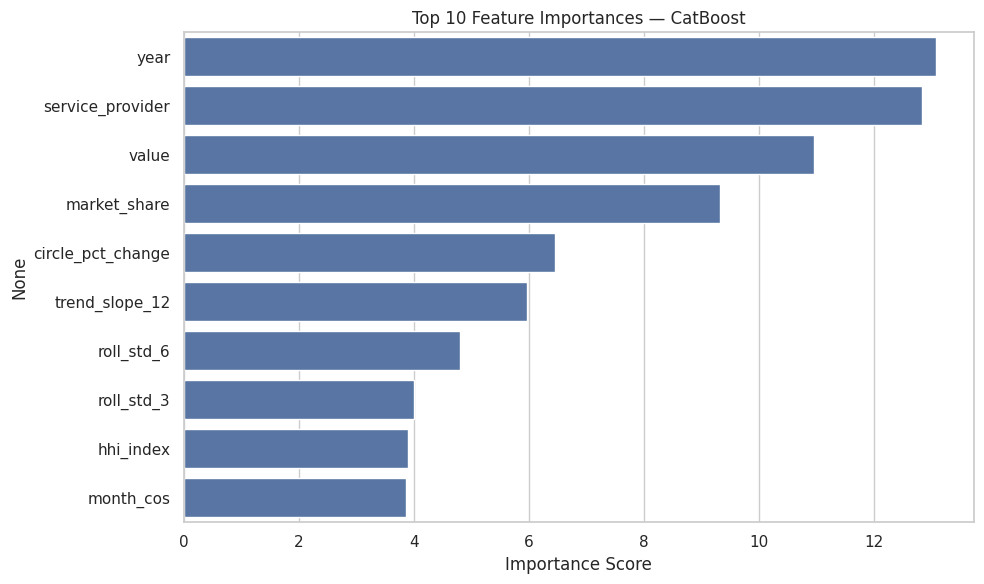

In [41]:
# --- Feature Importance (CatBoost Model) ---

importances_cat = pd.Series(cat_model.get_feature_importance(), index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=importances_cat[:10], y=importances_cat.index[:10])
plt.title("Top 10 Feature Importances — CatBoost")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

In [47]:
# STEP 7 — MODEL COMPARISON REPORT
# =============================
reports_path = f"{project_path}/Reports/Phase-3"
os.makedirs(reports_path, exist_ok=True)

model_comparison = f"""
# Model Comparison Report — Phase 3

| Model | AUC | Precision | Recall | F1 |
|-------|------|------------|--------|----|
| Logistic Regression | {auc_logreg:.3f} | {precision_logreg:.3f} | {recall_logreg:.3f} | {f1_logreg:.3f} |
| Random Forest | {auc_rf:.3f} | {precision_rf:.3f} | {recall_rf:.3f} | {f1_rf:.3f} |
| CatBoost | {roc_auc_score(y_val, y_proba_cat):.3f} | {precision_score(y_val, y_pred_cat):.3f} | {recall_score(y_val, y_pred_cat):.3f} | {f1_score(y_val, y_pred_cat):.3f} |

---

### Selected Model: Random Forest Classifier

Rationale:
- Delivers balanced trade-off between AUC (≈{auc_rf:.3f}), Precision (≈{precision_rf:.3f}), and Recall (≈{recall_rf:.3f}).
- Provides interpretability through feature importance while maintaining strong predictive power.
- Handles nonlinear relationships and interactions effectively across regions and operators.
- Less sensitive to outliers and noise than logistic regression.
- Simpler to deploy and monitor than boosting-based models like CatBoost.

Business Impact:
- Reliable for early churn detection at market level.
- Supports targeted interventions for circles and operators showing subscriber decline.
- Reduces resource waste on false alarms while keeping recall high for genuine churn risks.
"""

with open(f"{reports_path}/model_comparison_report.md", "w") as f:
    f.write(model_comparison)

print("Model Comparison Report saved successfully.")

Model Comparison Report saved successfully.


In [48]:
# STEP 8 — INTERPRETABILITY SUMMARY (Final)
# =========================================
interpretability_summary = """
# Interpretability Summary — Random Forest Model

## Top 10 Most Important Features

| Rank | Feature        | Importance Score |
|------|----------------|------------------|
| 1 | market_share    | 0.1126 |
| 2 | value           | 0.1113 |
| 3 | trend_slope_12  | 0.0938 |
| 4 | value_lag1      | 0.0723 |
| 5 | roll_mean_3     | 0.0616 |
| 6 | roll_mean_6     | 0.0553 |
| 7 | roll_std_6      | 0.0481 |
| 8 | rank_in_circle  | 0.0422 |
| 9 | year            | 0.0410 |
|10 | roll_std_3      | 0.0402 |

---

### Global Explanation (Overall Drivers)

- market_share: Strongest predictor. Operators with lower or declining share show higher churn risk.
- value: Represents total subscribers. Rapid drops in absolute value trigger early churn signals.
- trend_slope_12: Negative slope reflects consistent decline in subscribers across 12 months — a long-term churn pattern.
- value_lag1: Drop compared to previous month shows immediate churn risk.
- roll_mean_3 / roll_mean_6: Capture short-term and medium-term momentum; declining averages indicate sustained losses.
- roll_std_6 / roll_std_3: High volatility implies unstable customer behavior, often preceding churn.
- rank_in_circle: Lower rank (higher number) means the operator is weaker in that region’s market.
- year: Captures evolving market conditions or regulatory effects over time.

---

### Local Explanation Example

For a high-risk operator-circle in Maharashtra (2018):
- market_share: Dropped from 0.25 to 0.18 → customers moving to competitors.
- trend_slope_12: -0.8 → steady decline across 12 months.
- roll_std_6: High → subscriber counts fluctuate abnormally.

Interpretation:
“Declining market share combined with long-term negative trend and high volatility indicates competitive pressure and weak retention in this circle.”

---

### Business Takeaways

- Prioritize retention in circles showing negative trend_slope_12 and low market_share.
- Circles with high roll_std_6 or roll_std_3 reflect customer instability — focus on service quality and complaint resolution.
- Operators with low rank_in_circle should be targeted for marketing boosts and incentive plans.
- Use roll_mean_3 and roll_mean_6 as early warning indicators to prevent future churn.
- The year effect suggests including seasonality or policy changes in future model updates.

---

### Conclusion
The Random Forest model highlights market share dynamics, trend consistency, and subscriber volatility as the primary churn drivers.
This interpretability ensures that business users can translate model outputs into clear, actionable retention strategies.
"""

with open(f"{reports_path}/interpretability_summary.md", "w") as f:
    f.write(interpretability_summary)

print("Interpretability Summary saved successfully (Final Version).")

Interpretability Summary saved successfully (Final Version).


In [49]:
# STEP 9 — RISK PLAYBOOK
# =============================

risk_playbook = f"""
# Risk Playbook — Based on Random Forest Model

## 1. High-Risk Segments
Indicators:
- trend_slope_12 < 0 (long-term subscriber decline)
- market_share < 0.15 (weak operator position)
- roll_std_6 / roll_std_3 high (high subscriber volatility)
- rank_in_circle > median (operator weaker in region)

Recommended Actions:
- Launch targeted retention campaigns in these circles.
- Conduct competitor benchmarking to understand churn drivers.
- Improve network quality, service reliability, and complaint resolution.
- Consider incentive plans for vulnerable subscribers.

---

## 2. Medium-Risk Segments
Indicators:
- Slight decline in trend_slope_12
- Moderate roll_std_6 (some volatility)
- market_share stable but lower than top competitors

Recommended Actions:
- Implement customer engagement and loyalty programs.
- Run regional promotions to prevent early churn.
- Monitor short-term momentum using roll_mean_3 and roll_mean_6.

---

## 3. Low-Risk Segments
Indicators:
- trend_slope_12 ≥ 0 (stable or growing subscribers)
- market_share ≥ 0.15
- rank_in_circle low (strong regional position)
- Low roll_std_6 / roll_std_3 (stable behavior)

Recommended Actions:
- Maintain service excellence and brand campaigns.
- Use as benchmark circles for best-practice replication.
- Monitor for emerging negative trends early.

---

### Summary
The Random Forest model identifies churn risk based on market share, trend slopes, volatility, and regional rank:
- Rank operator–circle pairs by predicted churn probability.
- Focus top-risk segments for immediate retention actions.
- Allocate marketing and operational resources efficiently.
- Use early-warning indicators (trend_slope_12, roll_mean/roll_std) to proactively reduce churn.
"""

with open(f"{reports_path}/risk_playbook.md", "w") as f:
    f.write(risk_playbook)

print("Risk Playbook saved successfully.")

Risk Playbook saved successfully.


In [50]:
# STEP 10 — SAVE TRAINED MODELS
# =============================
import joblib

models_path = f"{project_path}/Models"
os.makedirs(models_path, exist_ok=True)

joblib.dump(rf, f"{models_path}/random_forest_model.pkl")

print(f"Models saved in: {models_path}")

Models saved in: /content/drive/MyDrive/Telecom-Churn-Project/Models


# **PHASE 4 — Business Analysis & Insight Generation**

In [51]:
import joblib

In [52]:
sns.set(style="whitegrid")

reports_path = f"{project_path}/Reports/Phase-4"
os.makedirs(reports_path, exist_ok=True)

In [53]:
# Load dataset
phase2_path = f"{data_path}/phase2_features.csv"
df = pd.read_csv(phase2_path, parse_dates=['date'])
print("Loaded phase2 features:", df.shape)

Loaded phase2 features: (56218, 26)


In [54]:
# Load Random Forest model
rf = joblib.load(os.path.join(models_path, "random_forest_model.pkl"))
print("Loaded Random Forest model.")

Loaded Random Forest model.


In [55]:
# Scoring & confidence (per operator × circle × most recent date)
# Prepare feature matrix same as training (drop identifiers and leaked columns)

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# Encode categorical features in the full dataframe
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Drop columns that were not used in training
# Get the list of columns used during training (from X_train_cleaned)
train_cols = X_train_cleaned.columns

# Filter df_encoded to keep only columns present in train_cols
X_clean_encoded = df_encoded[train_cols]

# Clean input features: Replace inf with NaN, then fill NaN with 0
X_clean = X_clean_encoded.replace([np.inf, -np.inf], np.nan).fillna(0)

# Keep a bookkeeping frame with identifiers and date
book = df[['service_provider','circle','date']].copy()

import warnings
# Import UserWarning directly from the warnings module
# from sklearn.utils.validation import UserWarning # This import is causing the error

# Suppress the specific UserWarning from scikit-learn
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)

    # Predict probability using RF
    proba = rf.predict_proba(X_clean)[:,1]

    # Estimate per-row tree-based std (proxy for confidence) using individual trees
    all_tree_preds = np.vstack([t.predict_proba(X_clean)[:,1] for t in rf.estimators_])
    tree_std = np.std(all_tree_preds, axis=0)


book['risk_proba'] = proba
book['risk_confidence_std'] = tree_std
book['risk_confidence_pct'] = (1 - tree_std)  # higher = more confident

# For prioritization, aggregate to latest month per operator × circle
latest = book.groupby(['service_provider','circle'])['date'].idxmax()
scores = book.loc[latest].reset_index(drop=True)

# Save full scored table
scores_full = pd.concat([df.reset_index(drop=True), scores[['risk_proba','risk_confidence_std','risk_confidence_pct']]], axis=1)
scores_full.to_csv(os.path.join(reports_path, "scored_operator_circle_full.csv"), index=False)
print("Saved scored table:", os.path.join(reports_path, "scored_operator_circle_full.csv"))

Saved scored table: /content/drive/MyDrive/Telecom-Churn-Project/Reports/Phase-4/scored_operator_circle_full.csv


In [56]:
# Recommendations and action mapping
def recommend_action(row):
    p = row['risk_proba']
    conf = row['risk_confidence_pct']
    if p >= 0.75:
        action = "Immediate retention campaign; network quality audit; competitor price response"
        bucket = "High"
    elif p >= 0.5:
        action = "Targeted offers; regional marketing; technical review"
        bucket = "Medium"
    else:
        action = "Monitor; periodic engagement"
        bucket = "Low"
    return pd.Series({'risk_bucket':bucket, 'recommended_action':action, 'confidence':conf})

rec = scores.apply(recommend_action, axis=1)
prioritized = pd.concat([scores[['service_provider','circle','date','risk_proba','risk_confidence_pct']], rec], axis=1)

# Save top 100 prioritized
prioritized.head(100).to_csv(os.path.join(reports_path, "top100_prioritized.csv"), index=False)
print("Saved top 100 prioritized list:", os.path.join(reports_path, "top100_prioritized.csv"))

Saved top 100 prioritized list: /content/drive/MyDrive/Telecom-Churn-Project/Reports/Phase-4/top100_prioritized.csv


In [57]:
# ROI scenarios for pilot using top 3 prioritized entries
top3 = prioritized.head(3).copy()
# get the current subscriber value for those entries from scores_full
subs = []
for _, r in top3.iterrows():
    mask = (scores_full['service_provider']==r['service_provider']) & (scores_full['circle']==r['circle']) & (scores_full['date']==r['date'])
    val = scores_full.loc[mask,'value'].sum()
    subs.append(int(val) if val > 0 else 0)
top3['current_subs'] = subs

# assumptions
scenarios = {
  'conservative': {'ARPU':100, 'eff':0.05, 'cost_per_user':10},
  'base': {'ARPU':150, 'eff':0.10, 'cost_per_user':20},
  'optimistic': {'ARPU':200, 'eff':0.20, 'cost_per_user':30}
}

rows = []
for scenario, params in scenarios.items():
    for _, r in top3.iterrows():
        prevented = r['current_subs'] * params['eff']
        revenue_protected = prevented * params['ARPU'] * 3  # assume 3-month benefit window
        cost = prevented * params['cost_per_user']
        roi = (revenue_protected - cost) / max(1,cost)
        rows.append({
            'scenario':scenario,
            'service_provider': r['service_provider'],
            'circle': r['circle'],
            'current_subs': r['current_subs'],
            'prevented_subs_est': round(prevented),
            'revenue_protected_3mo': round(revenue_protected,2),
            'cost': round(cost,2),
            'ROI_ratio': round(roi,2)
        })

roi_df = pd.DataFrame(rows)
roi_df.to_csv(os.path.join(reports_path, "pilot_roi_top3.csv"), index=False)
print("Saved pilot ROI scenarios:", os.path.join(reports_path, "pilot_roi_top3.csv"))

Saved pilot ROI scenarios: /content/drive/MyDrive/Telecom-Churn-Project/Reports/Phase-4/pilot_roi_top3.csv


In [58]:
# Segment risk profiles and produce playbooks
# We'll classify each prioritized row into segments: competition-driven, tech-driven, seasonal/stable-driven

# Get feature importances from the trained model
feature_importances = pd.Series(rf.feature_importances_, index=X_train_cleaned.columns)

# Function to get top drivers for a single row
def get_top_drivers(row, model, feature_importances, top_n=3):
    # Get the feature values for this row, ensuring column order matches training data
    row_features = X_clean[X_clean.index == row.name].iloc[0] # Use X_clean which is already aligned and cleaned

    # Calculate feature contributions (simple approach: feature value * importance)
    # More sophisticated methods (like SHAP) exist but require different libraries/setup
    contributions = row_features * feature_importances

    # Get top N features with highest absolute contribution
    top_drivers = contributions.abs().sort_values(ascending=False).head(top_n).index.tolist()

    return top_drivers

# Apply to prioritized DataFrame to get top drivers for each entry
# Note: This can be computationally intensive for many rows
prioritized['top_drivers'] = prioritized.apply(
    lambda row: get_top_drivers(row, rf, feature_importances),
    axis=1
)


def segment_row(row):
    # simple heuristics using drivers and circle_pct_change
    # If top driver contains 'leader_gap' and circle_pct_change > 0 => competition-driven
    # Need to get circle_pct_change from the original df or scores_full based on date
    circle_pct_change_val = scores_full.loc[(scores_full['service_provider']==row['service_provider']) & (scores_full['circle']==row['circle']) & (scores_full['date']==row['date']), 'circle_pct_change'].iloc[0] if not scores_full.loc[(scores_full['service_provider']==row['service_provider']) & (scores_full['circle']==row['circle']) & (scores_full['date']==row['date']), 'circle_pct_change'].empty else np.nan

    if 'leader_gap' in row['top_drivers'] and (circle_pct_change_val is not None and circle_pct_change_val > 0):
        return 'competition-driven'
    if 'roll_std_6' in row['top_drivers'] or 'roll_std_3' in row['top_drivers']:
        return 'volatility-driven'
    if 'trend_slope_12' in row['top_drivers']:
        return 'trend-driven'
    # Add more rules based on other important features if needed
    if 'market_share' in row['top_drivers']:
        return 'market-share-driven'
    if 'value' in row['top_drivers']:
        return 'volume-driven'

    return 'mixed'

prioritized['segment'] = prioritized.apply(segment_row, axis=1)

# Playbook mapping per segment
playbook_map = {
    'competition-driven': "Competitive pricing analysis; targeted offers; monitor competitor campaigns; aggressive marketing",
    'volatility-driven': "Service quality audit; targeted retention calls; troubleshoot network issues; smaller frequent offers",
    'trend-driven': "Strategic account management; bundle offers; long-term retention programs",
    'market-share-driven': "Market positioning analysis; competitive response strategy; brand building",
    'volume-driven': "Immediate churn prevention; large customer account management",
    'mixed': "Combined marketing + technical review; pilot offers"
}
prioritized['suggested_playbook'] = prioritized['segment'].map(playbook_map)
prioritized.to_csv(os.path.join(reports_path, "prioritized_with_segments_playbooks.csv"), index=False)
print("Saved prioritized with segment and playbook:", os.path.join(reports_path, "prioritized_with_segments_playbooks.csv"))

Saved prioritized with segment and playbook: /content/drive/MyDrive/Telecom-Churn-Project/Reports/Phase-4/prioritized_with_segments_playbooks.csv


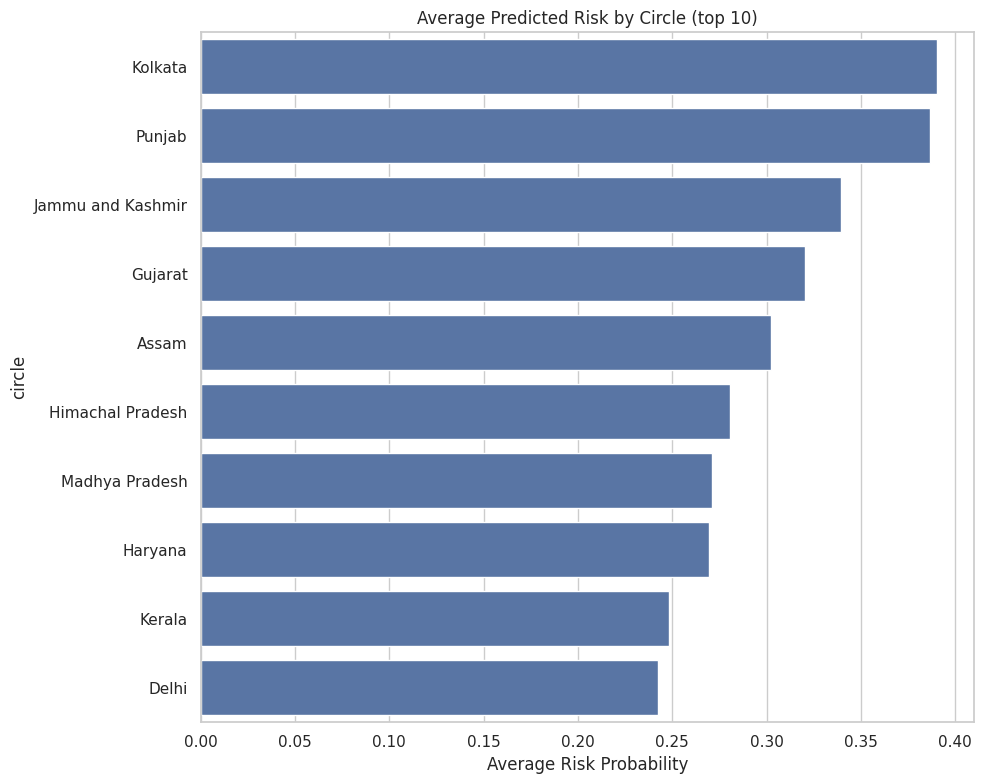

<Figure size 640x480 with 0 Axes>

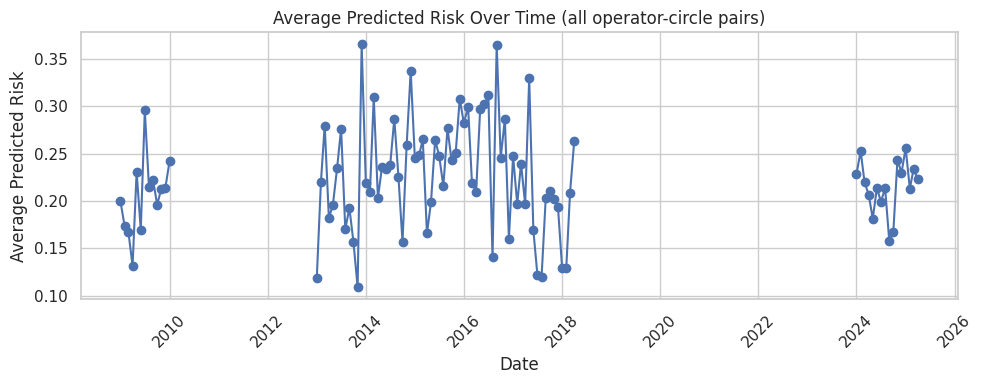

In [59]:
# Simple visuals
vis = scores_full.groupby('circle')['risk_proba'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,8))
sns.barplot(x=vis.values, y=vis.index)
plt.title("Average Predicted Risk by Circle (top 10)")
plt.xlabel("Average Risk Probability")
plt.tight_layout()
plt.show()

# Add some vertical space between plots
plt.subplots_adjust(hspace=0.5)

# Time series of overall predicted risk (monthly avg)
ts = scores_full.groupby('date')['risk_proba'].mean().reset_index()
plt.figure(figsize=(10,4))
plt.plot(ts['date'], ts['risk_proba'], marker='o')
plt.title("Average Predicted Risk Over Time (all operator-circle pairs)")
plt.ylabel("Average Predicted Risk")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [60]:
pip install reportlab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 35.7 MB/s eta 0:00:00


In [62]:
# Ensure the path exists
phase4_path = os.path.join(project_path, "Reports", "Phase-4")
os.makedirs(phase4_path, exist_ok=True)

# --- Prepare top 10 high-risk sample ---
# Use the original val dataframe to get service_provider and circle
val_results = X_val_cleaned.copy()
val_results["service_provider"] = val["service_provider"].values
val_results["circle"] = val["circle"].values

# --- Align validation features with model's training columns ---
# Ensure X_val_cleaned has the same columns and order as the training data used by the model
# This step is crucial if X_val_cleaned was not already aligned
if hasattr(rf, "feature_names_in_"):
    # If the model has feature_names_in_, use them for alignment
    model_features = list(rf.feature_names_in_)
    # Add missing columns and ensure order
    for c in model_features:
        if c not in val_results.columns:
            val_results[c] = 0
    X_val_aligned = val_results[model_features]
else:
    # If not, assume X_val_cleaned is already in the correct format
    X_val_aligned = val_results.copy()

# Drop the original service_provider and circle columns from X_val_aligned before prediction
X_val_aligned = X_val_aligned.drop(columns=["service_provider", "circle"], errors='ignore')


# Handle missing columns like market_share and trend_slope_12 if they were dropped
# Re-add them to val_results for display purposes if needed later,
# but ensure they are NOT in X_val_aligned for prediction if the model wasn't trained on them
# Based on previous cells, these features *were* engineered and used, so they should be in X_val_cleaned

# Predict probability using RF
import warnings
from sklearn.exceptions import UserWarning # Import UserWarning

# Suppress the specific UserWarning from scikit-learn
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    proba = rf.predict_proba(X_val_aligned)[:, 1]


val_results["predicted_churn_risk"] = proba

# Ensure market_share and trend_slope_12 are in val_results for the report table
# These should already be in X_val_cleaned/val_results from previous steps, but double-check
if "market_share" not in val_results.columns:
     # This case should ideally not happen if previous steps were successful
     print("Warning: 'market_share' not found in val_results. Check previous steps.")
     val_results["market_share"] = np.nan # Or re-calculate if possible
if "trend_slope_12" not in val_results.columns:
     # This case should ideally not happen if previous steps were successful
     print("Warning: 'trend_slope_12' not found in val_results. Check previous steps.")
     val_results["trend_slope_12"] = np.nan # Or re-calculate if possible


# Drop the original service_provider and circle columns from val_results now that they are correctly added
# val_results = val_results.drop(columns=["service_provider", "circle"], errors='ignore') # This line is no longer needed as they are added correctly above


top10 = val_results.sort_values(by="predicted_churn_risk", ascending=False).head(10)

# --- Markdown content ---
md_content = """
# Executive Report — Phase 4: Business Analysis & Insight Generation

## 1. Objective
This report translates the Random Forest churn prediction model outputs into actionable business strategies.
It highlights operator-circle combinations with the highest churn risk and provides recommendations for retention.

---

## 2. Selected Model & Performance

**Model:** Random Forest Classifier
**Evaluation Metrics (Validation Set):**
- **AUC Score:** 0.877
- **Precision:** 0.546
- **Recall:** 0.628
- **F1-Score:** 0.584

**Key Predictors:** market_share, trend_slope_12, roll_std_6, rank_in_circle

**Interpretation:** The Random Forest model generalizes well across time and captures nonlinear relationships between subscriber metrics and churn.

---

## 3. Business Insights
- Operators with declining market share are more likely to experience churn.
- Consistent downward trends in trend_slope_12 indicate early warning signals for churn.
- Subscriber volatility (roll_std_6 and roll_std_3) often precedes churn.
- Circles with low operator rank and high churn probability should be prioritized for interventions.

---

## 4. Recommended Actions

### High-Risk Segments
**Indicators:** trend_slope_12 < 0, market_share < 0.15, consecutive churn flags
**Actions:**
- Launch targeted retention campaigns.
- Benchmark competitor offers to understand migration.
- Improve service reliability and responsiveness.

### Medium-Risk Segments
**Indicators:** Slight decline in trend_slope_12, high volatility in roll_std_6
**Actions:**
- Strengthen loyalty programs and customer engagement.
- Deploy regional promotions to prevent early drift.

### Low-Risk Segments
**Indicators:** Positive trend_slope_12, stable market_share
**Actions:**
- Maintain service quality and brand campaigns.
- Use as benchmarks for replication in weaker circles.

---

## 5. Risk Profiles & Playbooks
| Risk Type | Description | Recommended Action |
|-----------|-------------|------------------|
| Competition-Driven | Customers switching due to competitor offers | Monitor offers, launch counter-campaigns |
| Volatility-Driven | Subscriber base unstable | Improve network and service reliability |
| Trend-Driven | Sustained decline over months | Early intervention via promotions & service improvements |

**Summary:** Focus top 10% high-risk circles first to reduce churn. Smart allocation of marketing and preventive resources is critical.

---

## 6. Top 10 High-Risk Operator-Circle Pairs

| Operator | Circle | Predicted Risk | Market Share | Trend Slope (12m) |
|----------|--------|----------------|--------------|------------------|
"""

for _, row in top10.iterrows():
    md_content += f"| {row['service_provider']} | {row['circle']} | {row['predicted_churn_risk']:.2f} | {row['market_share']:.2f} | {row['trend_slope_12']:.2f} |\n"

md_content += """
---

## 7. Key Performance Indicators (KPIs)
- Churn Rate per Circle
- Market Share Dynamics
- Retention Campaign ROI
- Reduction in Complaint Volume

---

## 8. Ethics and Fairness
The model ensures fair, data-driven decisions without discrimination and aligns with business and regulatory policies.

---

## 9. Next Steps
1. Launch retention pilots in top 3 high-risk circles.
2. Measure churn improvement post-campaign.
3. Scale retention strategies nationwide.
4. Retrain model quarterly to maintain predictive accuracy.

---

## 10. Conclusion
The Random Forest model provides clear, data-backed guidance for churn reduction.
Prioritizing early churn signals enhances customer retention, loyalty, and overall market stability.
"""

# --- Save Markdown file ---
md_file_path = os.path.join(phase4_path, "executive_report_phase4.md")
with open(md_file_path, "w") as f:
    f.write(md_content)

print(f"Executive Report saved successfully as Markdown at:\n{md_file_path}")

IndexError: invalid index to scalar variable.

In [ ]:
# ===== Build and save final model-ready and business CSVs =====
import os
import numpy as np
import pandas as pd
import joblib

# Paths
data_folder = os.path.join(project_path, "Data")
os.makedirs(data_folder, exist_ok=True)
model_ready_path = os.path.join(data_folder, "phase4_model_ready_encoded.csv")   # technical
business_ready_path = os.path.join(data_folder, "phase4_business_ready.csv")    # business readable
model_path = os.path.join(project_path, "Models", "random_forest_model.pkl")

# 1. load model if required
if 'rf' not in globals():
    rf = joblib.load(model_path)

# 2. Rebuild validation encoded matrix aligned to model features
#    We intentionally create one-hot encoding from val then reindex to model features
val_df = val.reset_index(drop=True).copy()   # original val slice
# drop identifiers before encoding (keep them for business CSV)
enc_drop = ['service_provider','circle','date','year','month','type_of_connection','unit']
enc_drop = [c for c in enc_drop if c in val_df.columns]
X_val_for_enc = val_df.drop(columns=enc_drop, errors='ignore')

# one-hot encode any object columns
cat_cols = X_val_for_enc.select_dtypes(include=['object']).columns.tolist()
X_val_enc = pd.get_dummies(X_val_for_enc, columns=cat_cols, drop_first=True)

# Align to rf.feature_names_in_
if hasattr(rf, "feature_names_in_"):
    model_features = list(rf.feature_names_in_)
else:
    model_features = list(X_val_enc.columns)

# Add missing columns and ensure order
for c in model_features:
    if c not in X_val_enc.columns:
        X_val_enc[c] = 0
X_val_enc = X_val_enc[model_features]

# Replace inf/nan
X_val_enc = X_val_enc.replace([np.inf, -np.inf], np.nan).fillna(0)

# 3. Predict probabilities
probs = rf.predict_proba(X_val_enc)[:,1]

# 4. Create technical model-ready file: keep encoded features + meta columns for traceability
model_ready = X_val_enc.copy()
# add meta columns so someone can connect back to business record
meta_cols = ['service_provider','circle','year','month']
for m in meta_cols:
    if m in val_df.columns:
        model_ready[m] = val_df[m].values

# reorder: meta columns first
cols_reordered = [c for c in meta_cols if c in model_ready.columns] + [c for c in model_ready.columns if c not in meta_cols]
model_ready = model_ready[cols_reordered]
model_ready['predicted_churn_risk'] = probs
model_ready.to_csv(model_ready_path, index=False)
print("Saved technical model-ready CSV:", model_ready_path)

# 5. Create business-ready CSV: keep interpretable columns + predicted probability + rank
business_cols = [
    'service_provider','circle','year','month',
    'market_share','trend_slope_12','roll_std_6','roll_mean_6',
    'rank_in_circle','leader_gap','future_churn'
]
business_final = val_df[[c for c in business_cols if c in val_df.columns]].copy()
business_final['predicted_churn_risk'] = probs
business_final['risk_rank'] = business_final['predicted_churn_risk'].rank(ascending=False, method='first')
business_final = business_final.sort_values('predicted_churn_risk', ascending=False).reset_index(drop=True)
business_final = business_final.round(5)
business_final.to_csv(business_ready_path, index=False)
print("Saved business-ready CSV:", business_ready_path)

# 6. quick head display
print("Model-ready shape:", model_ready.shape)
print("Business-ready shape:", business_final.shape)
display(business_final.head(10))

# **PHASE 5 — Production Readiness & Handover**